# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [7]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used

#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [8]:
# Installing the libraries with the specified version.
# Uncomment and run the following lines if Jupyter Notebook is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
#!pip install --upgrade -q threadpoolctl


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


## Loading the dataset

In [12]:
df = pd.read_csv('C:\\Users\\Nobody\\Downloads\\school stuff\\Credit Card Users Churn Prediction\\BankChurners.csv')

## Data Overview

- Observations
- Sanity checks

In [15]:
"""
proceed to a sanity check ,
by looking at the ,
first few rows. 

"""
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [16]:
""""
look at the basic info 
about the dataset. 

The df.head, function, 
tells me that that the 
dataset is 5 rows , but usually,
shows most/all columns
i have 21 columns,
Perhaps.


"""



'"\nlook at the basic info \nabout the dataset. \n\nThe df.head, function, \ntells me that that the \ndataset is 5 rows , but usually,\nshows most/all columns\ni have 21 columns,\nPerhaps.\n\n\n'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [18]:
"""
CLIENTNUM: is the unique indentifier for each client (data type is int64)

Attrition Flag : whether the the customeer has churned or not(data type is a object)

customer age: how old is the customer (data type is int64)

gender: the gender of the customer (data type is a object)

dependent count: the number of dependents the customer has (data type is int64)

education level: the highest of education achieved by the customer (data type is object)
(Missing Values) (8608) out of 10127 (need to be encoded)

marital status: the marital status of the customer (either single , married, divorced)
(data type is an object) (missing values) 9378 out of 10127

income category: the income of the customer column. (data type is object)


card category: the type of credit card teh customer has. (data type is object)

months on book : the total number of months the customer has been with the bank.
(data type is int64)

total reltaionship count: the total number of products held by the customer with the bank
(data type is int64)

months inactive 12 mon: the number of months in the last 12 months , 
the customer has been inactive . (data type is int64)

credit limit : the customer credit limit (data type is a float64)

total revlolving bal : the total revolving balance ,
on the customer's credit card   (data type is int64)

avg open to buy : the average open-to-buy credit (available credit) ,
over the customer's credit limit. (data type is float 64)

total Amt Chng Q4 Q1: the change in transcation amount from Q4 to Q1
(data type is a float64)

total Trans Amt: The total Transaction amount from the last 12 months 
(int64)

Total Trans Ct: the total transcation count (number of transactions) 
in the last 12 months (data type is int 64)

Total CT Chng Q4 Q1: the change in transaction count from Q4 to Q1

AVg Utilization Ratio: the average credit card utilization ratio
(total balance divided by credit limit) (data type is float64)






"""

"\nCLIENTNUM: is the unique indentifier for each client (data type is int64)\n\nAttrition Flag : whether the the customeer has churned or not(data type is a object)\n\ncustomer age: how old is the customer (data type is int64)\n\ngender: the gender of the customer (data type is a object)\n\ndependent count: the number of dependents the customer has (data type is int64)\n\neducation level: the highest of education achieved by the customer (data type is object)\n(Missing Values) (8608) out of 10127 (need to be encoded)\n\nmarital status: the marital status of the customer (either single , married, divorced)\n(data type is an object) (missing values) 9378 out of 10127\n\nincome category: the income of the customer column. (data type is object)\n\n\ncard category: the type of credit card teh customer has. (data type is object)\n\nmonths on book : the total number of months the customer has been with the bank.\n(data type is int64)\n\ntotal reltaionship count: the total number of products h

In [19]:
print(df.columns)


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [20]:
"""
Understanding the nature of Missing Data
"""

# checking the proportion of missing values in each column
print(df['Education_Level'].isnull().mean() * 100)
print(df['Marital_Status'].isnull().mean() * 100)

14.999506270366346
7.3960699121161255


In [21]:
"""
In the education Level column , the missing values percentage is 15%

in the Marital Status column , the missing values percentage is   7.40% 

"""

'\nIn the education Level column , the missing values percentage is 15%\n\nin the Marital Status column , the missing values percentage is   7.40% \n\n'

In [22]:
"""
    RECOMMENDATION TO HANDLE MISSING DATA
i would suggest to impute missing values with mode, which is the frequent value.


"""

'\n    RECOMMENDATION TO HANDLE MISSING DATA\ni would suggest to impute missing values with mode, which is the frequent value.\n\n\n'

In [23]:
df['Education_Level'] = df['Education_Level'].fillna(df['Education_Level'].mode()[0])
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [24]:
print(df['Education_Level'].isnull().sum()) # Should return 0 
print(df['Marital_Status'].isnull().sum()) # shoudl return 0 

0
0


In [25]:
# checking for duplicates
print(df.duplicated().sum())


0


In [26]:
# checking data types
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [27]:
# dropping clientnum since its just the identifier 
df.drop('CLIENTNUM', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [32]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

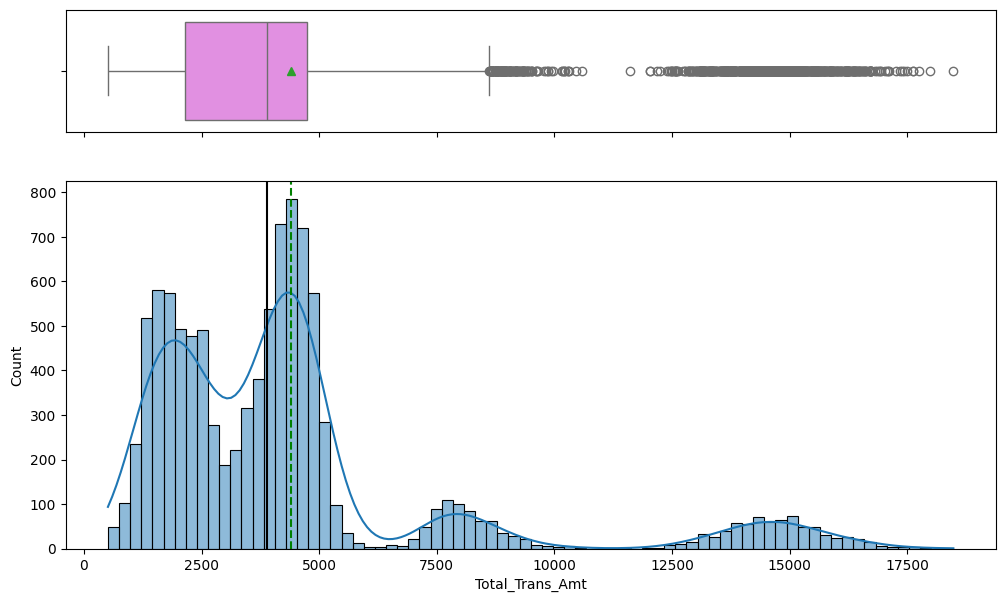

In [33]:
# call the function to the boxplot and histogram for 'Total_Trans_Amt'
histogram_boxplot(df, 'Total_Trans_Amt', kde=True)
plt.savefig('Histogram&BoxPlot.png')

In [34]:
"""
1) How is the total transaction amount distributed?
answer: In my analysis of both the boxplot and histogram, I noticed several interesting patterns in how the transaction amounts are distributed. The most striking feature is that the distribution isn't simply bell-shaped but shows multiple distinct peaks, suggesting different groups of transaction patterns.
Looking at the histogram first, I observed four main clusters of transactions:

A substantial group centered around $2,500
The largest concentration of transactions around $4,500-$5,000
A smaller but noticeable group near $7,500
A minor cluster around $15,000

What I found particularly interesting was the shape of the distribution.
It's clearly skewed to the right, meaning there are many more unusually ,
high transactions than low ones. This matches what I learned about skewness in class,
– when we see a long tail stretching to the right like this, it indicates positive skewness.
The boxplot helped me confirm these observations and added more detail. 
The pink box, which represents where the middle 50% of all transactions fall, 
shows that most "typical" transactions are in a relatively lower range. 
However, what really caught my attention were the many dots extending to the 
right of the whiskers. These outliers represent unusually large transactions, 
reaching up to about $17,500.
""" 

'\n1) How is the total transaction amount distributed?\nanswer: In my analysis of both the boxplot and histogram, I noticed several interesting patterns in how the transaction amounts are distributed. The most striking feature is that the distribution isn\'t simply bell-shaped but shows multiple distinct peaks, suggesting different groups of transaction patterns.\nLooking at the histogram first, I observed four main clusters of transactions:\n\nA substantial group centered around $2,500\nThe largest concentration of transactions around $4,500-$5,000\nA smaller but noticeable group near $7,500\nA minor cluster around $15,000\n\nWhat I found particularly interesting was the shape of the distribution.\nIt\'s clearly skewed to the right, meaning there are many more unusually ,\nhigh transactions than low ones. This matches what I learned about skewness in class,\n– when we see a long tail stretching to the right like this, it indicates positive skewness.\nThe boxplot helped me confirm thes

Education_Level
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


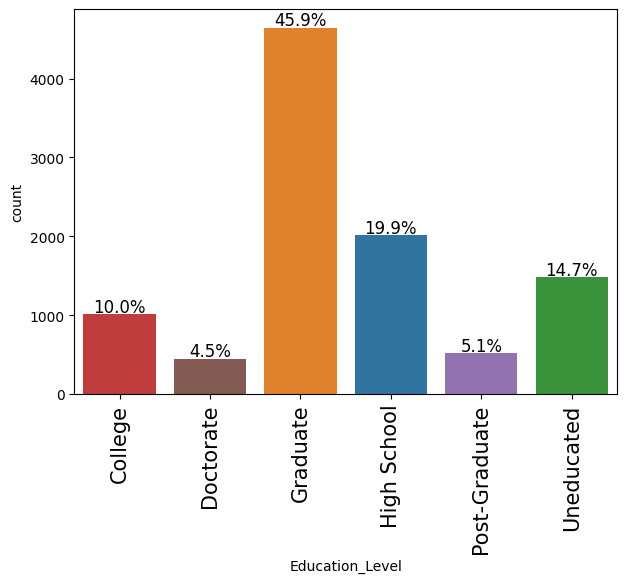

In [35]:
# function to create labeled barplots

def labeled_barplot(df, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    # Print the value counts to make sure data is as expected
    print(df[feature].value_counts())

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()  # count of unique categories
    if n is None:
        plt.figure(figsize=(count + 1, 5))  # dynamic figure size based on number of unique categories
    else:
        plt.figure(figsize=(n + 1, 5))  # dynamic size based on value

    plt.xticks(rotation=90, fontsize=15)

    # Sorting and limiting categories if n is provided
    order = df[feature].value_counts().index[:n].sort_values()

    ax = sns.countplot(
        data=df,
        x=feature,
        hue=feature,
        order=order,
        legend=False
    )

    # Annotating each bar with count or percentage 
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the labels

   
   
# Calling the function with column name "Education_Level"
labeled_barplot(df, 'Education_Level', perc=True)
plt.savefig('EducationLvlBoxplot.png')

plt.show()

plt.close()


In [36]:
"""
2) What is the distribution of the level of education of customers? 
Answer:
The distribution of education levels among customers shows distinct patterns:
Graduate degree holders form the largest segment, comprising 45.9% ,
of the customer base. 
This represents nearly half of all customers,suggesting a highly educated,
customer population.
The second-largest group consists of High School graduates at 19.9%, 
accounting for approximately one-fifth of customers.

Uneducated customers make up 14.7% of the total, forming the third-largest segment.
College degree holders represent 10.0% of customers, while Post Graduate and Doctorate degree holders make up smaller proportions ,
at 5.1% and 4.5% respectively.

Key observations:
Despite the dominance of higher education levels, the bank also has a sizable,
portion of customers from lower educational backgrounds.This reflects a broad ,
market appeal with credit cards, likely designed to cater to different income ,
or financial situations.

Business Recommendation:  Given the importance of retaining customers,
Thera Bank should consider tailoring their marketing and retention strategies,
to target customers with varying educational levels. For instance:

Graduate and Advanced Degree Holders: Offering premium services or perks,
may further appeal to this group, who may expect more from financial products.

Uneducated and High School Graduates: Targeted communication and simpler financial,
products may help retain customers with less formal education, ensuring they ,
understand and value the benefits of using the credit card.

"""

'\n2) What is the distribution of the level of education of customers? \nAnswer:\nThe distribution of education levels among customers shows distinct patterns:\nGraduate degree holders form the largest segment, comprising 45.9% ,\nof the customer base. \nThis represents nearly half of all customers,suggesting a highly educated,\ncustomer population.\nThe second-largest group consists of High School graduates at 19.9%, \naccounting for approximately one-fifth of customers.\n\nUneducated customers make up 14.7% of the total, forming the third-largest segment.\nCollege degree holders represent 10.0% of customers, while Post Graduate and Doctorate degree holders make up smaller proportions ,\nat 5.1% and 4.5% respectively.\n\nKey observations:\nDespite the dominance of higher education levels, the bank also has a sizable,\nportion of customers from lower educational backgrounds.This reflects a broad ,\nmarket appeal with credit cards, likely designed to cater to different income ,\nor fina

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64


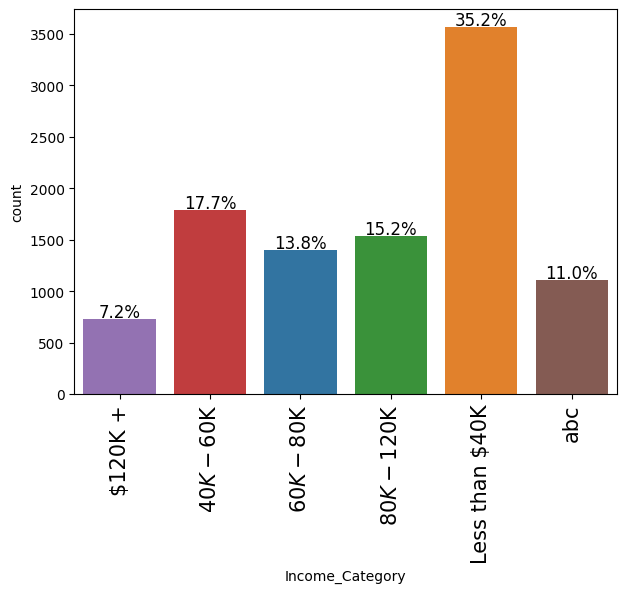

In [37]:
# Calling the function with column name "Income"
import matplotlib.pyplot as plt
labeled_barplot(df, 'Income_Category', perc=True)
plt.savefig('Income_Category.png')

plt.show()

plt.close()



In [38]:
"""
Question 3) What is the distribution of the level of income of customers?

Answer : 
The income distribution of Thera Bank’s customers shows that the 40K bracket,
has the highest representation, making up 35.2% of the customer base, followed by ,
17.7% in the 60K bracket.

There’s a balanced distribution in the 20K (15.2%) and 80K (13.8%) brackets.
However, only 7.2% of customers fall into the 90K+ bracket, 
indicating fewer high-income earners. 

Business Action: Thera Bank can consider tailoring its credit card offerings to cater,
to both middle-income customers, who represent the majority, and higher-income earners, 
who may require more premium products or services. 

"""

'\nQuestion 3) What is the distribution of the level of income of customers?\n\nAnswer : \nThe income distribution of Thera Bank’s customers shows that the 40K bracket,\nhas the highest representation, making up 35.2% of the customer base, followed by ,\n17.7% in the 60K bracket.\n\nThere’s a balanced distribution in the 20K (15.2%) and 80K (13.8%) brackets.\nHowever, only 7.2% of customers fall into the 90K+ bracket, \nindicating fewer high-income earners. \n\nBusiness Action: Thera Bank can consider tailoring its credit card offerings to cater,\nto both middle-income customers, who represent the majority, and higher-income earners, \nwho may require more premium products or services. \n\n'

In [39]:
print(df.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


Attrition_Flag       Attrited Customer  Existing Customer    All
Total_Ct_Chng_Q4_Q1                                             
All                               1627               8500  10127
Other                             1388               7071   8459
0.5                                 58                103    161
0.6                                 25                 88    113
0.75                                19                137    156
1.0                                 17                149    166
0.667                               16                155    171
0.556                               13                 33     46
0.778                               10                 59     69
0.625                               10                 53     63
0.571                                9                 48     57
0.833                                9                 76     85
0.714                                9                 83     92
0.8                      

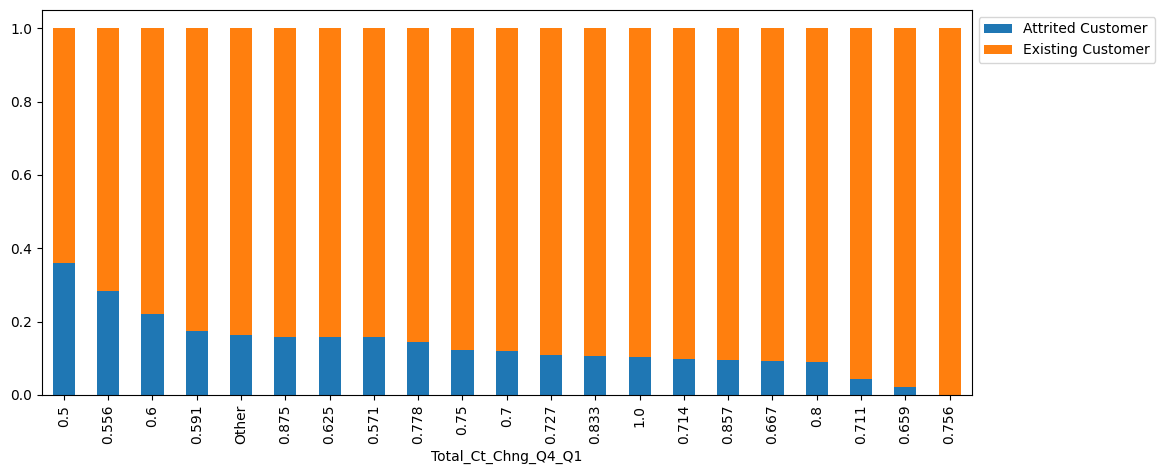

In [40]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target, max_categories=20):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()

    # check if the preidctor has more categories than the threshold
    if count > max_categories:
        # Group less frequent values into an 'other' category
        top_categories = data[predictor].value_counts().nlargest(max_categories).index
        data = data.copy()

        data[predictor] = data[predictor].astype('object')
       
        data.loc[~data[predictor].isin(top_categories), predictor] = 'Other'
    
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    # NOrmalize the counts and plot the stacked bar chart 
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    # set a reasonable figure size to avoid overly large plot 
    tab.plot(kind="bar", stacked=True, figsize=(min(count + 1, 12), 5))
    #addjust the legend position and show plot 
    plt.legend(loc="lower left", frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.savefig("Total_Ct_Chng_Q4_Q1")
    plt.show()
    
stacked_barplot(df,'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

In [41]:
"""
Question 4) How does the change in transaction amount between Q4 and Q1 
(total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

answer: 
The analysis reveals a clear negative relationship between changes,
in transaction amounts from Q4 to Q1 and customer attrition. 
Customers with lower transaction changes (around 0.5-0.6) are more likely to churn,
with up to 35% identified as attrited customers. As the transaction change increases,
the proportion of attrited customers decreases, 
with minimal attrition observed for changes greater than 0.7.

This suggests that customers who maintain or increase their transaction counts between,
Q4 and Q1 are more likely to remain as existing customers, 
while those with declining transactions are at higher risk of attrition.
"""

"\nQuestion 4) How does the change in transaction amount between Q4 and Q1 \n(total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?\n\nanswer: \nThe analysis reveals a clear negative relationship between changes,\nin transaction amounts from Q4 to Q1 and customer attrition. \nCustomers with lower transaction changes (around 0.5-0.6) are more likely to churn,\nwith up to 35% identified as attrited customers. As the transaction change increases,\nthe proportion of attrited customers decreases, \nwith minimal attrition observed for changes greater than 0.7.\n\nThis suggests that customers who maintain or increase their transaction counts between,\nQ4 and Q1 are more likely to remain as existing customers, \nwhile those with declining transactions are at higher risk of attrition.\n"

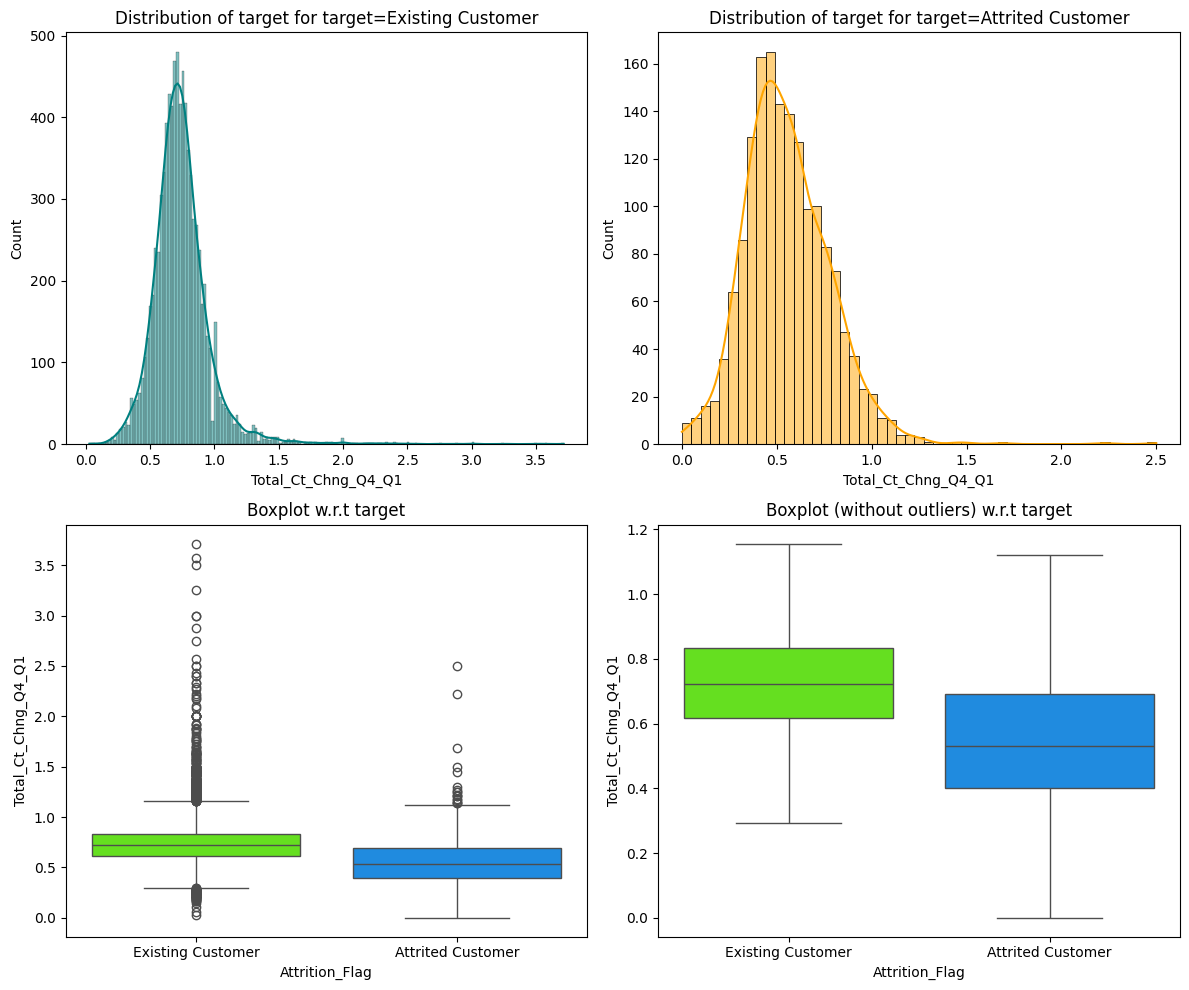

In [42]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], hue=target,palette="gist_rainbow", legend=False)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        hue=target,
        palette="gist_rainbow",
        legend=False
    )

    plt.tight_layout()
    plt.savefig('TotalCTChangeQ4Q1Plots.png')
    plt.show()
  
# calling the function to analyze how "total_ct_change_Q4_Q1' ,varies by 'Attrition_Flag'
distribution_plot_wrt_target(df,'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')


In [43]:
"""
question 5)How does the number of months a customer was inactive in the last 12 months?

answer: Upon reviewing the data, it became evident that customers who have churned ,
(marked as "Attrited") show significantly higher inactivity. These customers tended,
to have more months where they were inactive. For example,
the majority of churned customers had 4 or more inactive months,
in the past year,which suggests a strong link between customer inactivity 
and their likelihood to leave the service.

On the other hand, 
Existing Customers (those who stayed with the service) had far fewer inactive months,
typically around 0 to 2 months. This indicates that staying engaged and active with,
the service is a key factor in customer retention.

Insights:
This data clearly suggests that inactivity is a major predictor of customer churn. 
Customers who are inactive for longer periods of time are much more likely to leave,
while those who remain engaged and use the service more frequently tend to stay loyal.

Recommendations:
Based on this finding, my recommendation to the business would be to monitor inactivity,
patterns closely and create targeted strategies to re-engage customers who have been,
inactive for 3 or more months. By offering incentives or personalized communication,
to these customers, the company might be able to reduce the churn rate and retain more,
customers.



"""

'\nquestion 5)How does the number of months a customer was inactive in the last 12 months?\n\nanswer: Upon reviewing the data, it became evident that customers who have churned ,\n(marked as "Attrited") show significantly higher inactivity. These customers tended,\nto have more months where they were inactive. For example,\nthe majority of churned customers had 4 or more inactive months,\nin the past year,which suggests a strong link between customer inactivity \nand their likelihood to leave the service.\n\nOn the other hand, \nExisting Customers (those who stayed with the service) had far fewer inactive months,\ntypically around 0 to 2 months. This indicates that staying engaged and active with,\nthe service is a key factor in customer retention.\n\nInsights:\nThis data clearly suggests that inactivity is a major predictor of customer churn. \nCustomers who are inactive for longer periods of time are much more likely to leave,\nwhile those who remain engaged and use the service more 

In [44]:
#ONE-Hot encoding for cateogrical variables
df_encoded= pd.get_dummies(df,drop_first=True) # drop_first avoids mulitcollinearity in binary columns

# Preview the resulting DataFrame after encoding
print(df_encoded.head())
print(df_encoded.info()) # Check number of columns 

   Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  .

In [45]:
# checking for any duplicated columns after one-hot encoding
df_encoded.columns.duplicated().sum()

0

In [46]:
# select only numeric clumns for correleation
numeric_df=df.select_dtypes(include=['float64', 'int64'])

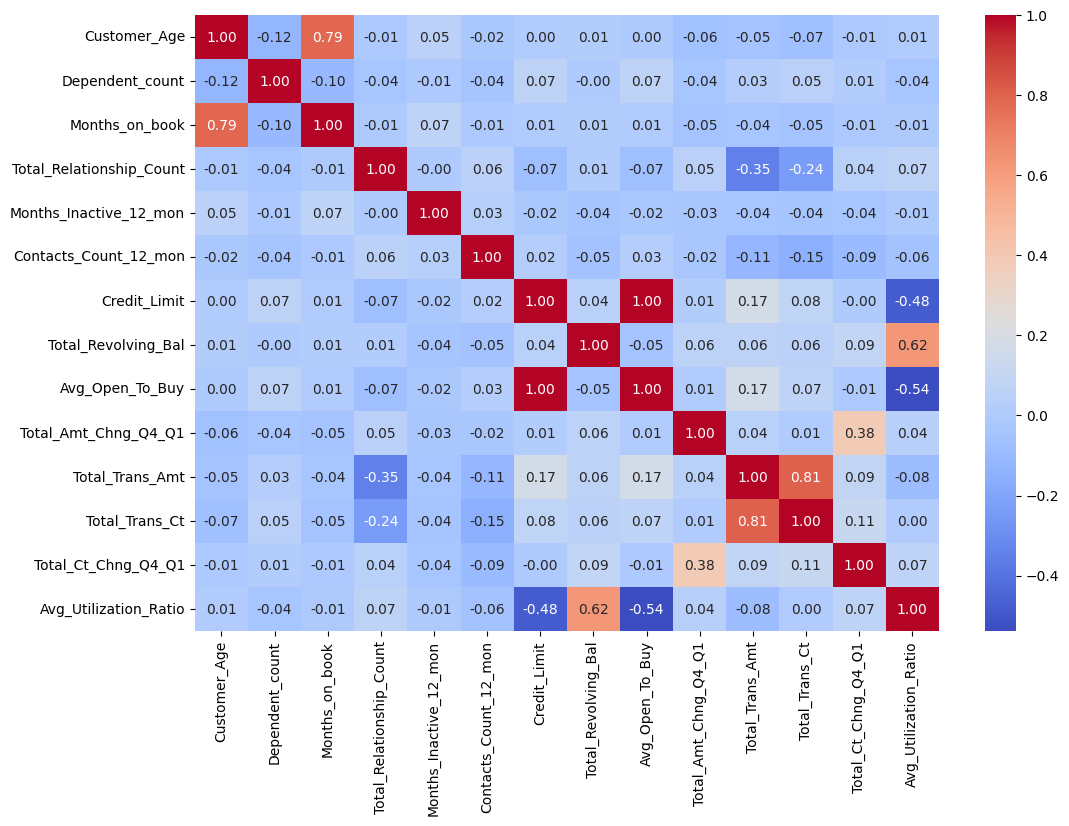

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True,cmap="coolwarm",fmt=".2f")
plt.savefig('NumericCorelationMap.png')
plt.show()

In [48]:
"""
question 6) What are the attributes that have a strong correlation with each other?

answer: the attributes that have a strong correlation are : 

Months on Book and Total Relationship Count: There is a strong positive correlation ,
between Months_on_book and how long a customer has been with a bank. 
This makes sense as customers who have been with the bank for a longer period tend,
to have more relationships with the bank, such as savings accounts, credit cards,
or loans.

Total_Trans_Ct and Total_trans_Amt: total transaction count and total transaction amount,
positve correlate .As customers who make more transactions generally have a higher,
total transaction amount.

credit limit and average utilization ratio negatively correlate.  
This indicates that customers with higher credit limits tend to utilize ,
a smaller percentage of their available credit, which could be an indicator,
of financial stability.

Months on book and  Months inactive: There’s a moderate correlation, +
suggests that the longer a customer has been with the bank,
the more likely they are to experience some periods of inactivity.
"""

'\nquestion 6) What are the attributes that have a strong correlation with each other?\n\nanswer: the attributes that have a strong correlation are : \n\nMonths on Book and Total Relationship Count: There is a strong positive correlation ,\nbetween Months_on_book and how long a customer has been with a bank. \nThis makes sense as customers who have been with the bank for a longer period tend,\nto have more relationships with the bank, such as savings accounts, credit cards,\nor loans.\n\nTotal_Trans_Ct and Total_trans_Amt: total transaction count and total transaction amount,\npositve correlate .As customers who make more transactions generally have a higher,\ntotal transaction amount.\n\ncredit limit and average utilization ratio negatively correlate.  \nThis indicates that customers with higher credit limits tend to utilize ,\na smaller percentage of their available credit, which could be an indicator,\nof financial stability.\n\nMonths on book and  Months inactive: There’s a moderat

## Data Pre-processing

In [50]:
#Seperating features and target variable 
X=df.drop('Attrition_Flag', axis=1)
y=df['Attrition_Flag']

In [51]:
#Encoding categorical variables if any
X_encoded = pd.get_dummies(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [52]:
# Splitting the data into train and test sets
X_train, X_test,y_train,y_test = train_test_split(X_encoded,y_encoded, test_size=0.2, random_state=42)

In [53]:
# training a Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
# getting feature importances
importances = clf.feature_importances_

In [55]:
# creating a DataFrame to match feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
})

In [56]:
# sorting feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by ='Importance', ascending=False)


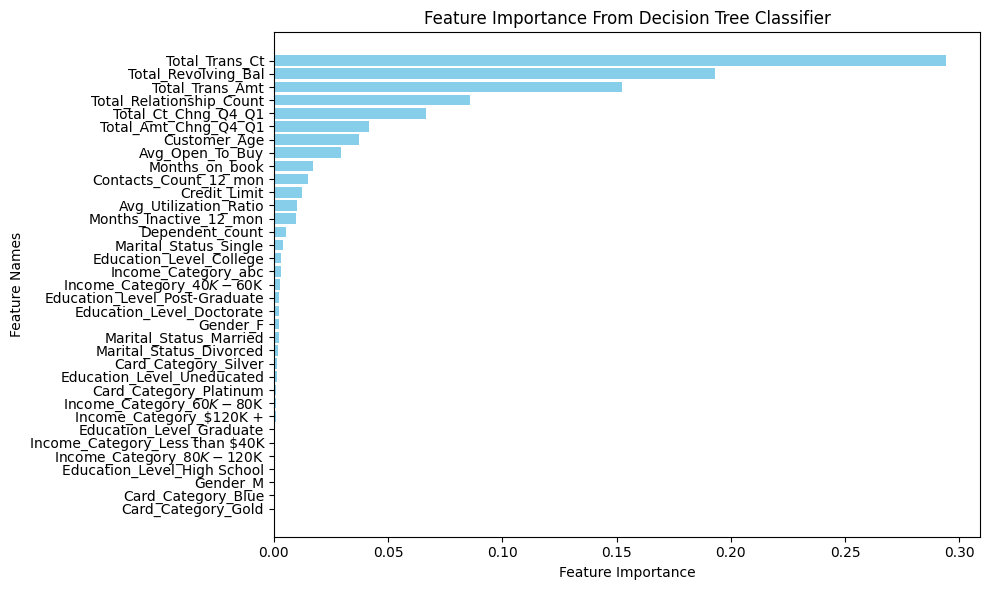

In [57]:
# Plotting feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color= 'skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance From Decision Tree Classifier')
plt.gca().invert_yaxis() # to display the highest importance feature at the top 
plt.tight_layout()
plt.savefig('FeatureImportanceDecisiontree.png')
plt.show()


In [58]:
"""
Based on the feature importance from the Decision Tree classifier, the following key insights were observed:

Total Transaction Count was identified as the most significant predictor of customer churn, highlighting that the frequency of transactions plays a critical role in understanding churn behavior.
Total Revolving Balance and Total Transaction Amount also ranked highly, indicating that higher spending and revolving balances contribute substantially to the prediction.
Other notable features include Total Relationship Count, Total Change in Transaction Count (Q4 to Q1), and Customer Age, suggesting that the depth of customer engagement and transaction patterns across time are key factors.
Gender was less influential, with Female (Gender F) being slightly more impactful than Male (Gender M), but overall, gender differences are not as significant.
Income levels and card categories had minimal influence, with Income_Category_40K–60K and Card_Category_Silver showing the most relevance among them but still ranked low in importance.
Educational level and marital status also showed minimal impact, signifying that demographic information plays a less critical role in predicting churn for this dataset.
In conclusion, transaction-related features carry the most weight in determining customer churn, while demographic factors are relatively less important.
"""


'\nBased on the feature importance from the Decision Tree classifier, the following key insights were observed:\n\nTotal Transaction Count was identified as the most significant predictor of customer churn, highlighting that the frequency of transactions plays a critical role in understanding churn behavior.\nTotal Revolving Balance and Total Transaction Amount also ranked highly, indicating that higher spending and revolving balances contribute substantially to the prediction.\nOther notable features include Total Relationship Count, Total Change in Transaction Count (Q4 to Q1), and Customer Age, suggesting that the depth of customer engagement and transaction patterns across time are key factors.\nGender was less influential, with Female (Gender F) being slightly more impactful than Male (Gender M), but overall, gender differences are not as significant.\nIncome levels and card categories had minimal influence, with Income_Category_40K–60K and Card_Category_Silver showing the most re

## Missing value imputation




In [60]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
# filter the rows where msising values are greater than 0
missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
#display the missing data
missing_data

,Missing Values,Percentage
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Gender,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0
Marital_Status,0,0.0
Income_Category,0,0.0
Card_Category,0,0.0
Months_on_book,0,0.0
Total_Relationship_Count,0,0.0


In [61]:
# checking if all categorical columns have been converted
categorical_cols= df.select_dtypes(include=['object', 'category'])

if len(categorical_cols) ==0:
    print("ALL categorical columns have been successfully converted into numerical value.") 
else:
    print("These columns are still categorical and need to be converted:", categorical_cols)
    


These columns are still categorical and need to be converted:           Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Married   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M        Graduate       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Married   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          

In [62]:
"""
additional categorical columns need to be convered to numerical values ,
before we proceed to model building
"""

'\nadditional categorical columns need to be convered to numerical values ,\nbefore we proceed to model building\n'

In [63]:
# one hot encding for certain columns ()

df = pd.get_dummies(df, columns = ['Gender', 'Marital_Status','Income_Category', 'Card_Category'], drop_first=True)

In [64]:
# Label Encoding for certain columns (Education_Level) 

#label Encoding for Education Level and Attrition Flag
label_cols = ['Education_Level', 'Attrition_Flag']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [65]:
# checking if all categorical columns have been converted
categorical_cols= df.select_dtypes(include=['object', 'category'])

if len(categorical_cols) ==0:
    print("ALL categorical columns have been successfully converted into numerical value.") 
else:
    print("These columns are still categorical and need to be converted:", categorical_cols)
    


These columns are still categorical and need to be converted: Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[10127 rows x 0 columns]


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [70]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [71]:
# defiining function to plot confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    Function to plot confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Creating the confusion matrix
    cm = confusion_matrix(target, pred)

    # Plotting the confusion Matrix
    plt.figure(figsize=(6,4))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    

### Model Building with original data

Sample code for model building with original data

In [74]:
#Splitting data into train valdiation , and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.2, random_state=1 )
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9979835013748855
Random forest: 1.0
AdaBoost: 0.9855178735105408
Gradient Boosting: 0.9930339138405133
XGBoost: 1.0

Validation Performance:

Bagging: 0.9769687964338781
Random forest: 0.9918276374442794
AdaBoost: 0.9843982169390788
Gradient Boosting: 0.9910846953937593
XGBoost: 0.9858841010401189


### Model Building with Oversampled data


In [76]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [77]:
# Create and append models to the list
models_over = []
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

In [78]:
# Training and Validation Performance on OverSampled Data
print("\nTraining Performance on OverSampled Data:" "\n")
for name, model in models_over:
    model.fit(X_train_over,y_train_over)
    scores = recall_score(y_train_over,model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\nValidation Performance on Oversampled Data:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))
    


Training Performance on OverSampled Data:

Bagging: 0.997250229147571
Random Forest: 1.0
AdaBoost: 0.9411549037580201
Gradient Boosting: 0.9792850595783684
XGBoost: 1.0

Validation Performance on Oversampled Data:

Bagging: 0.9598811292719168
Random Forest: 0.974739970282318
AdaBoost: 0.9390787518573551
Gradient Boosting: 0.9732540861812778
XGBoost: 0.9829123328380386


### Model Building with Undersampled data

In [80]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [81]:
#Create and append models to the list(AGAIN)
models_un = []
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random Forrest", RandomForestClassifier(random_state=1)))
models_un.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_un.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models_un.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

In [82]:
# Training and Validation Performance on Undersampled Data
print("\nTraining Performance on Undersampled Data:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\nValidation Performance on Undersampled Data:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance on Undersampled Data:

Bagging: 0.9921951219512195
Random Forrest: 1.0
AdaBoost: 0.9219512195121952
Gradient Boosting: 0.9795121951219512
XGBoost: 1.0

Validation Performance on Undersampled Data:

Bagging: 0.8989598811292719
Random Forrest: 0.936849925705795
AdaBoost: 0.9011887072808321
Gradient Boosting: 0.9353640416047548
XGBoost: 0.9450222882615156


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [88]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='accuracy', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

#Printint the best parameters and corresponding CV score 
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9243827160493827:


#### Sample tuning method for Decision tree with oversampled data

In [90]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='accuracy', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.9081576535288726:


#### Sample tuning method for Decision tree with undersampled data

In [92]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='accuracy', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8931707317073171:


## Model Comparison and Final Model Selection

In [94]:
bagging_model = BaggingClassifier(random_state=1).fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=1).fit(X_train,y_train)
ada_boost_model = AdaBoostClassifier(random_state=1).fit(X_train,y_train)
grad_boost_model = GradientBoostingClassifier(random_state=1).fit(X_train, y_train)
xgb_model = XGBClassifier(random_state=1).fit(X_train, y_train)

# Create a list of the models and their names 
models_final = [("Bagging", bagging_model),
                ("Random Forest", rf_model),
                ("AdaBoost", ada_boost_model),
                ("Gradient Boosting", grad_boost_model),
                ("XGBoost", xgb_model)]

In [95]:
# store performance metrics in a dictionary
performance = {}

# Evaluate each model on validation set and store metrics
for name, model in models_final:
    # Predict on validation data
    y_pred_val = model.predict(X_val)

In [96]:
# calculate metrics
accuracy = accuracy_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
f1 = f1_score(y_val,y_pred_val)

In [97]:
# store the results in the dictionary 
performance[name] = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# print out the performance of each model 
for name, metrics in performance.items():
    print(f"{name}: {metrics}")

XGBoost: {'Accuracy': 0.9691548426896978, 'Recall': 0.9858841010401189, 'Precision': 0.9771723122238586, 'F1 Score': 0.981508875739645}


### Test set final performance

In [99]:
# choosing the best model based on the comparions above 
final_model = xgb_model # XGBoost chosen as the beset model

# make predictions on the test set
y_pred_test = final_model.predict(X_test)


In [100]:
# calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Test set performance:\n")
print(f"Accuracy: {accuracy_test}")
print(f"Recall: {recall_test}")
print(f"Precision: {precision_test}")
print(f"F1 Score: {f1_test}")

Test set performance:

Accuracy: 0.9590325765054294
Recall: 0.9805768098881695
Precision: 0.9708624708624709
F1 Score: 0.9756954612005857


# Business Insights and Conclusions

In [102]:
"""
BUSINESS INSIGHT

Customer Demographics & Behavior:
Attrition is closely tied to age, income, and education level.
Customers in lower income brackets and with less education are more likely to leave. 
The bank should focus on these groups by offering  like lower-interest loan,
and financial planning services.

Card Usage Patterns:
A higher credit utilization ratio is linked to higher attrition.
The bank can offer personalized credit limits or guidance on responsible credit usage.
Promoting cards with lower utilization thresholds may also help reduce churn.

Inactivity as a Churn Indicator:
Customers with prolonged inactivity, especially those with high revolving balances, 
are more likely to leave. Targeted re-engagement campaigns with offers or account ,
reviews can help retain these customers.

Improving Customer Experience:
A drop in total transactions or transaction counts, particularly in the last quarter,
signals increased churn risk. Loyalty programs or targeted incentives can boost.
engagement and reduce attrition.

"""

'\nBUSINESS INSIGHT\n\nCustomer Demographics & Behavior:\nAttrition is closely tied to age, income, and education level.\nCustomers in lower income brackets and with less education are more likely to leave. \nThe bank should focus on these groups by offering  like lower-interest loan,\nand financial planning services.\n\nCard Usage Patterns:\nA higher credit utilization ratio is linked to higher attrition.\nThe bank can offer personalized credit limits or guidance on responsible credit usage.\nPromoting cards with lower utilization thresholds may also help reduce churn.\n\nInactivity as a Churn Indicator:\nCustomers with prolonged inactivity, especially those with high revolving balances, \nare more likely to leave. Targeted re-engagement campaigns with offers or account ,\nreviews can help retain these customers.\n\nImproving Customer Experience:\nA drop in total transactions or transaction counts, particularly in the last quarter,\nsignals increased churn risk. Loyalty programs or ta

In [103]:
"""
CONCLUSION


Through my analysis, we’ve identified key factors driving customer churn,
such as demographics, card usage patterns, and inactivity.
By addressing these areas with targeted strategies, the bank can significantly ,
reduce attrition and improve customer retention. Tailored financial products, 
personalized credit management, and re-engagement efforts will help retain,
at-risk customers and boost overall satisfaction. 
The findings offer actionable steps the bank can take to not only improve 
its relationship with customers but also strengthen its long-term growth and stability.

the model performance doing so well, thera bank will be able to successfully predict ,
the likely hood of churning. :) 
"""

'\nCONCLUSION\n\n\nThrough my analysis, we’ve identified key factors driving customer churn,\nsuch as demographics, card usage patterns, and inactivity.\nBy addressing these areas with targeted strategies, the bank can significantly ,\nreduce attrition and improve customer retention. Tailored financial products, \npersonalized credit management, and re-engagement efforts will help retain,\nat-risk customers and boost overall satisfaction. \nThe findings offer actionable steps the bank can take to not only improve \nits relationship with customers but also strengthen its long-term growth and stability.\n\nthe model performance doing so well, thera bank will be able to successfully predict ,\nthe likely hood of churning. :) \n'